<a href="https://colab.research.google.com/github/diogocoding/titanic-analise-exploratoria-python-EDA/blob/main/atvd_04_tratamento_e_an%C3%A1lise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import matplotlib.pyplot as plt #.pyplot é uma interface que torna o matplotlib +fácil e prático
import seaborn as sns

In [72]:
sns.set_style('whitegrid') #define o estilo dos gráficos
plt.rcParams['figure.figsize'] = (10, 6) #define o tamanho padrão para as figuras dos gráficos

In [73]:
df = pd.read_csv('train.csv') #lê o arquivo e armazena o resultado em na variável df
print("5 primeiras linhas do conjunto de dados")
print(df.head())

5 primeiras linhas do conjunto de dados
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

In [74]:
print("\nInformações gerais sobre o conjunto de dados")
df.info()


Informações gerais sobre o conjunto de dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
#tratando dados da coluna "Age"
df_tratado = df.copy() #boa prática para evitar alterar o DataFrame original diretamente
mediana_idade = df_tratado['Age'].median() #pegar as medianas da coluna Age
df_tratado['Age'].fillna(mediana_idade, inplace=True) #preenche tds valores ausentes (NaN) com o valor atribuido a mediana_idade
print(f"A mediana da idade é: {mediana_idade:.2f} anos. Usamos esse valor para preencher os dados ausentes.")
#:.2f -> especifica que o número deve ser exibido com 2 dígitos após o ponto decimal e o f indica (fixed-point)
#a notação decimal padrão e garante que ele seja arredondado corretamente

A mediana da idade é: 28.00 anos. Usamos esse valor para preencher os dados ausentes.


/tmp/ipython-input-841110557.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tratado['Age'].fillna(mediana_idade, inplace=True) #preenche tds valores ausentes (NaN) com o valor atribuido a mediana_idade


In [76]:
#tratando dados da coluna "Embarked"
moda_embarque = df_tratado['Embarked'].mode()[0]
#.mode -> nos retorna o valor +frequente
#[0] nos dá o primeiro valor da lista da moda, em case de empate - que
#ocorre quando há mais de um valor com a mesma frquência
df_tratado['Embarked'].fillna(moda_embarque, inplace=True)
print(f"O porto de embarque mais comum é: '{moda_embarque}'. Usamos este valor para preencher os dados ausentes.")

O porto de embarque mais comum é: 'S'. Usamos este valor para preencher os dados ausentes.


/tmp/ipython-input-2723374665.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tratado['Embarked'].fillna(moda_embarque, inplace=True)


In [77]:
#Removendo a coluna "Cabin"
df_tratado.drop('Cabin', axis=1, inplace=True) #remove a coluna 'Cabin' e faz essa alterção diretamente no DataFrame, sem fazer cópia
print(f"A coluna 'Cabin' foi removida devido ao alto número de valores ausentes (+de 77% de valores ausentes)")

A coluna 'Cabin' foi removida devido ao alto número de valores ausentes (+de 77% de valores ausentes)


In [78]:
#verificando os valores ausentes
print("\nInformações do DataFrame após o tratamento:")
df_tratado.info()


Informações do DataFrame após o tratamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [79]:
#agora com todas as 11 colunas possuindo 891 valores não nulos (dados limpos de dados ausentes),
#vamos preparar os dados para análise
#algumas colunas possuem dados categóricos - ex: sex('male', 'female') e Embarked('S', 'C', 'Q') -
#precisamos converter em dados numéricos
#utilizaremos a estratégia One-Hot Encoding - pois resolve o problema da falsa ordenação, transformando cada categoria em uma nova coluna
#se usássemos o LabelEncoder geraríamos uma relação de ordem - que não existe na realidade
#o pandas tem a função pd.get_dumies(), que faz exatamente isso prara nós

In [80]:
#iremos primeiro exibir os valores únicos das colunas categóricas
print("Valores únicos em 'Sex' antes:", df_tratado['Sex'].unique())
print("Valores únicos em 'Embarked'", df_tratado['Embarked'].unique())

Valores únicos em 'Sex' antes: ['male' 'female']
Valores únicos em 'Embarked' ['S' 'C' 'Q']


In [81]:
#aplicando o One-hot Encoding com pd.get_dummies()
df_categorico = pd.get_dummies(df_tratado, columns=['Sex', 'Embarked'], drop_first=True)

In [82]:
#vamos remover as colunas 'Name', 'Ticket', 'PassengerId', pois há muita cardinalidade
df_final = df_categorico.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
#exibindo as primeiras linhas do DataFrame tratado (dados categóricos convertidos e NaN preenchidos adequadamente)
print("\nAs 05 primeiras linhas do DataFrame tratado:")
print(df_final.head())


As 05 primeiras linhas do DataFrame tratado:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [83]:
#Iniciaremos agora a padronização dos dados
#Tendo em vista que Age varia de 0 a 80, enquanto que Fare varia de 0 a 500
#iremos usar a estratégia "StandardScaler" da biblioteca Scikit-learn
#assim a média será igual a 0 e desvio padrão igual a 1
#a coluna Survived é a variável que queremos entender e prever. Nesse sentido, não iremos padronizá-la

In [84]:
#importando o StandardScaler
from sklearn.preprocessing import StandardScaler

In [85]:
#precisamos separar a variável alvo (y) das variáveis de caracteísticas(x)
# x - terá todas as colunas que descrevem o passageiro
# y - terá apenas a informação de sobrevivências (que é o que queremos analisar)
x = df_final.drop('Survived', axis=1)
y = df_final['Survived']

In [86]:
#Até o momento, a variável x é um DataFrame do pandas, que é como uma planilha e possui rótulos
#mas quando executamos a padronização do StandardScaler, ele realiza os cálculos (subtrai a média e divide pelo desvio padrão)
#e nos devolve um Array do Numpy, qua não possui rótulos/nomes nas colunas
#a solução será guardar os nomes antes de perdê-los
colunas_x = x.columns

In [87]:
#criando uma instância do StandardScaler
#.fit_transform() -> calcula a média e o desvio padrão de cada coluna em x e aplica a transformação para padronizá-las
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [88]:
#criando um novo DataFrame com os dados padronizados
df_padronizado = pd.DataFrame(x_scaled, columns=colunas_x)

In [89]:
#exibindo as estatísticas para confirmar a padronização (média deve estar bem próximo de 0 e o desvio padrão bem próximo de 1)
print("\nEstatísticas do DataFrame padronizado (arredondado para 2 casas decimais):")
print(df_padronizado.describe().round(2))


Estatísticas do DataFrame padronizado (arredondado para 2 casas decimais):
       Pclass     Age   SibSp   Parch    Fare  Sex_male  Embarked_Q  \
count  891.00  891.00  891.00  891.00  891.00    891.00      891.00   
mean    -0.00    0.00    0.00    0.00    0.00     -0.00        0.00   
std      1.00    1.00    1.00    1.00    1.00      1.00        1.00   
min     -1.57   -2.22   -0.47   -0.47   -0.65     -1.36       -0.31   
25%     -0.37   -0.57   -0.47   -0.47   -0.49     -1.36       -0.31   
50%      0.83   -0.10   -0.47   -0.47   -0.36      0.74       -0.31   
75%      0.83    0.43    0.43   -0.47   -0.02      0.74       -0.31   
max      0.83    3.89    6.78    6.97    9.67      0.74        3.25   

       Embarked_S  
count      891.00  
mean        -0.00  
std          1.00  
min         -1.62  
25%         -1.62  
50%          0.62  
75%          0.62  
max          0.62  


In [90]:
#tratamento e preparação concluido
#agora realizaremos a análise exploratória de dados (EDA)

In [91]:
#proporção de passageiros que sobreviveram e que não sobreviveram
#usaremos o df_tratado, antes da padronização
#pois mantém as colunas originais 'Sex' e Embarked, que são mais fáceis de interpretar
#0 -> não sobreviveu e 1 -> sobreviveu
contagem_sobrevivencia = df_tratado['Survived'].value_counts()
print("Contagem de passageiros que sobreviveram e que não sobreviveram:")
print(contagem_sobrevivencia)

Contagem de passageiros que sobreviveram e que não sobreviveram:
Survived
0    549
1    342
Name: count, dtype: int64


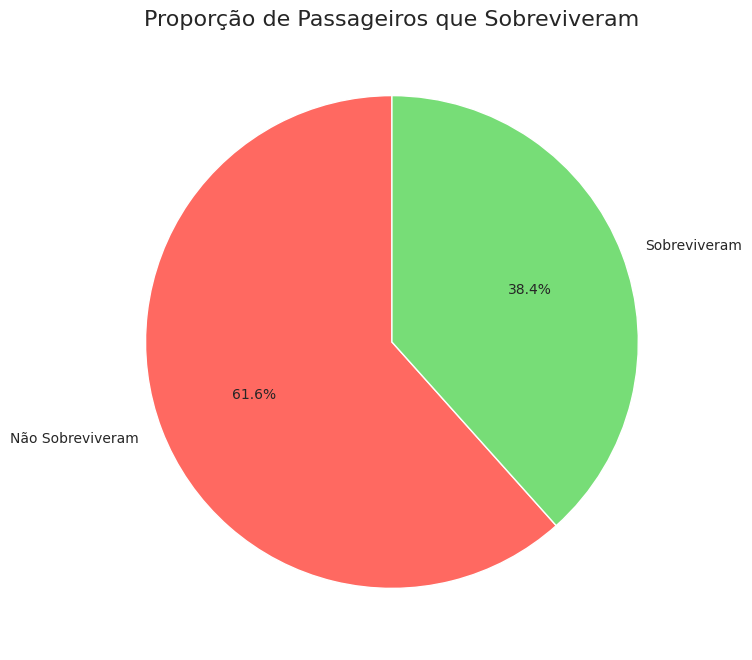

In [92]:
#gráfico de pizza para a contagem de sobrevivência
plt.figure(figsize=(8, 8))
plt.pie(contagem_sobrevivencia,
        labels=['Não Sobreviveram', 'Sobreviveram'],
        autopct='%1.1f%%', #formata os valores para percentual com uma casa decimal
        startangle=90, #gira o gráfico
        colors = ['#ff6961', '#77dd77']) # Cores para as fatias
plt.title('Proporção de Passageiros que Sobreviveram', fontsize=16)
plt.ylabel('') #remove o rótulo do eixo y que o matplotlib adiciona por padrão
plt.show()


/tmp/ipython-input-701096661.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Masculino', 'Feminino'])


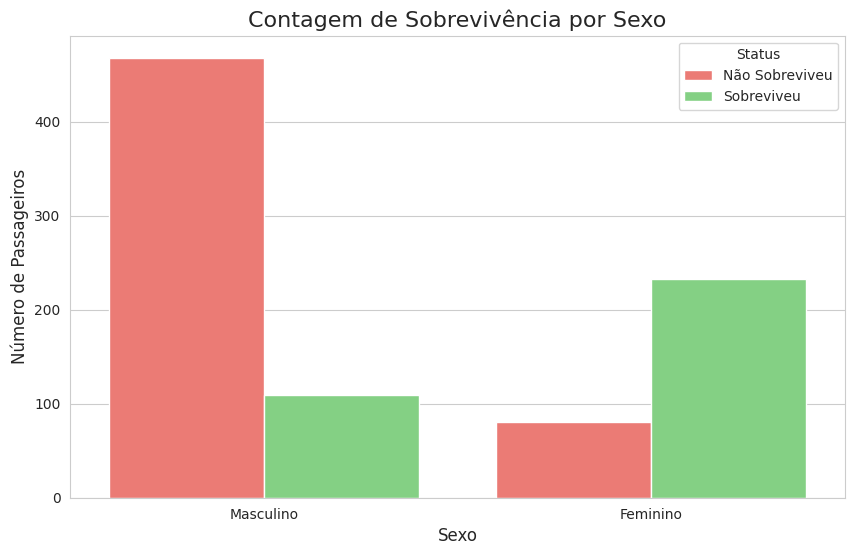


Taxa de Sobrevivência por Sexo:
Mulheres: 74.20%
Homens: 18.89%


In [100]:
#análise de sobrevivência por sexo
plt.figure(figsize=(10, 6))
#sns.countplot() conta as ocorrências em cada categoria
# 'x="Sex"' define a variável no eixo x.
# 'hue="Survived"' divide as barras por outra variável (no caso, Sobreviveu ou Não).
# 'data=df_tratado' informa ao Seaborn qual DataFrame usar.
ax = sns.countplot(x='Sex', hue='Survived', data=df_tratado, palette={0: '#ff6961', 1: '#77dd77'})
#melhorando o gráfico
plt.title('Contagem de Sobrevivência por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Número de Passageiros', fontsize=12)
# Alterando os rótulos do eixo x e da legenda para maior clareza
ax.set_xticklabels(['Masculino', 'Feminino'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Não Sobreviveu', 'Sobreviveu'], title='Status')
plt.show()
# Calculando os percentuais para uma análise mais precisa
# O '.groupby('Sex')['Survived']' agrupa os dados por sexo e seleciona a coluna 'Survived'.
# '.mean()' em uma coluna de 0s e 1s calcula a proporção de 1s (ou seja, a taxa de sobrevivência).
taxa_sobrevivencia_sexo = df_tratado.groupby('Sex')['Survived'].mean() * 100
print("\nTaxa de Sobrevivência por Sexo:")
print(f"Mulheres: {taxa_sobrevivencia_sexo['female']:.2f}%")
print(f"Homens: {taxa_sobrevivencia_sexo['male']:.2f}%")

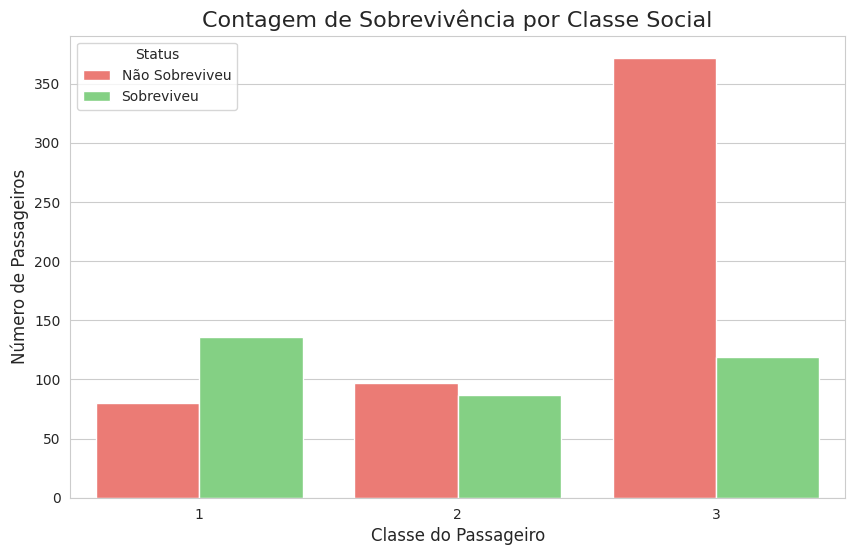


Taxa de Sobrevivência por Classe:
1ª Classe: 62.96%
2ª Classe: 47.28%
3ª Classe: 24.24%


In [101]:
#análise de sobrevivência por classe
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Pclass', hue='Survived', data=df_tratado, palette={0: '#ff6961', 1: '#77dd77'})

# Melhorando o gráfico
plt.title('Contagem de Sobrevivência por Classe Social', fontsize=16)
plt.xlabel('Classe do Passageiro', fontsize=12)
plt.ylabel('Número de Passageiros', fontsize=12)

# Alterando os rótulos da legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Não Sobreviveu', 'Sobreviveu'], title='Status')

plt.show()

# Calculando os percentuais de sobrevivência para cada classe
taxa_sobrevivencia_classe = df_tratado.groupby('Pclass')['Survived'].mean() * 100
print("\nTaxa de Sobrevivência por Classe:")
print(f"1ª Classe: {taxa_sobrevivencia_classe[1]:.2f}%")
print(f"2ª Classe: {taxa_sobrevivencia_classe[2]:.2f}%")
print(f"3ª Classe: {taxa_sobrevivencia_classe[3]:.2f}%")

/tmp/ipython-input-3902715102.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age = df.groupby('AgeGroup')['Survived'].mean().reset_index()
/tmp/ipython-input-3902715102.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=survival_rate_by_age, palette='viridis')


Gráfico 'survival_rate_by_age_group.png' foi salvo.
Gráfico 'age_distribution_survival.png' foi salvo.


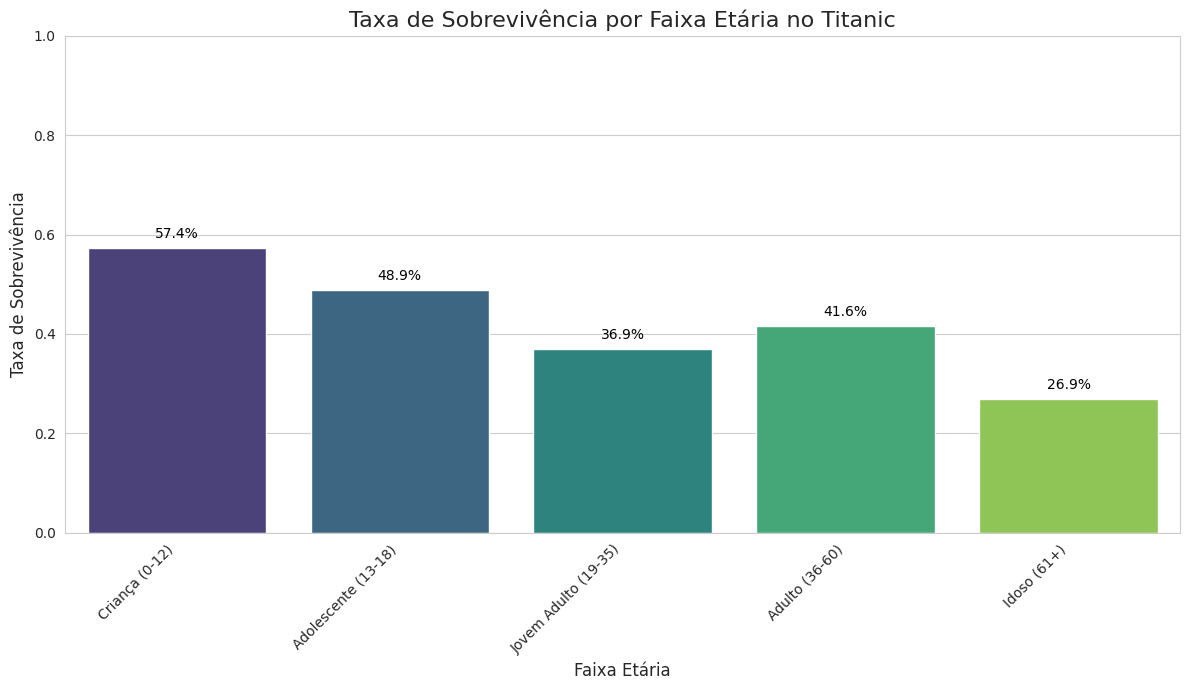

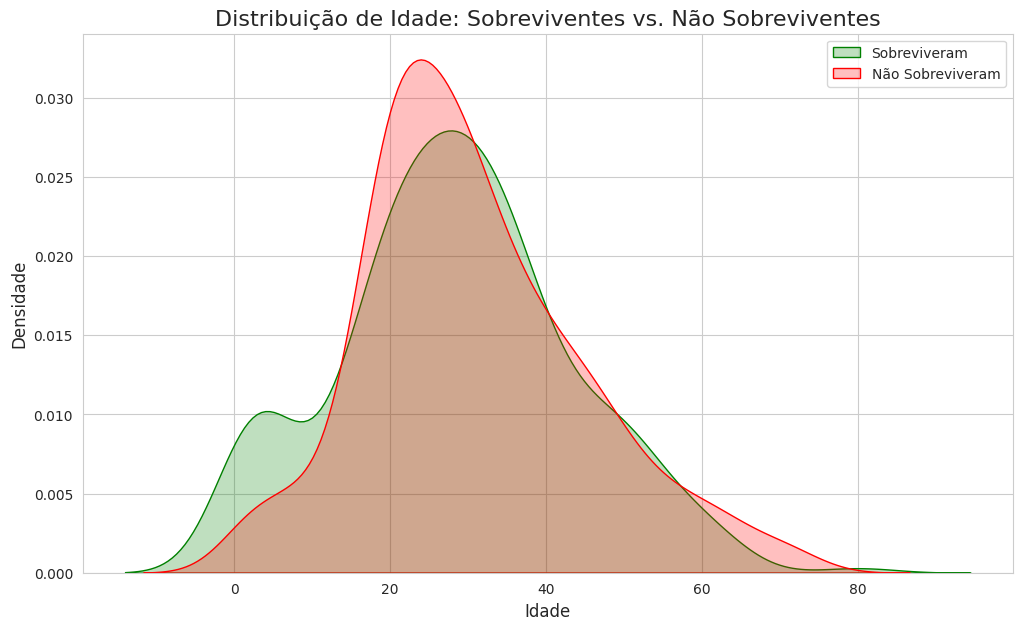

In [102]:
# --- Análise por Faixa Etária ---
# 1. Criar faixas etárias (bins) para agrupar os passageiros.
bins = [0, 12, 18, 35, 60, 81]
labels = ['Criança (0-12)', 'Adolescente (13-18)', 'Jovem Adulto (19-35)', 'Adulto (36-60)', 'Idoso (61+)']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 2. Calcular a taxa de sobrevivência para cada faixa etária.
# Usamos groupby() para agrupar por 'AgeGroup' e .mean() em 'Survived' para obter a taxa.
survival_rate_by_age = df.groupby('AgeGroup')['Survived'].mean().reset_index()

# --- Visualizações ---

# Gráfico 1: Taxa de Sobrevivência por Faixa Etária
plt.figure(figsize=(12, 7))
sns.barplot(x='AgeGroup', y='Survived', data=survival_rate_by_age, palette='viridis')
plt.title('Taxa de Sobrevivência por Faixa Etária no Titanic', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Taxa de Sobrevivência', fontsize=12)
plt.ylim(0, 1.0) # Ajustar o limite do eixo Y para ir de 0 a 1 (0% a 100%)
# Adicionar os valores percentuais no topo das barras
for index, row in survival_rate_by_age.iterrows():
    plt.text(row.name, row.Survived + 0.02, f'{row.Survived:.1%}', color='black', ha="center", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('survival_rate_by_age_group.png')
print("Gráfico 'survival_rate_by_age_group.png' foi salvo.")


# Gráfico 2: Distribuição de Idade para Sobreviventes vs. Não Sobreviventes
plt.figure(figsize=(12, 7))
# Usamos sns.kdeplot para uma visualização suave da distribuição
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Sobreviveram', color='green', fill=True)
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Não Sobreviveram', color='red', fill=True)
plt.title('Distribuição de Idade: Sobreviventes vs. Não Sobreviventes', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend()
plt.savefig('age_distribution_survival.png')
print("Gráfico 'age_distribution_survival.png' foi salvo.")

**Conclusão da Análise Exploratória de Dados**

📊
O Que os Dados Revelam Sobre a Taxa de Sobrevivência?
A primeira grande revelação é que a sobrevivência no naufrágio do Titanic não foi uma questão de sorte 🎲. A taxa de sobrevivência geral foi baixa, com apenas 38.4% dos passageiros conseguindo se salvar. Por trás desses números, existe uma história clara de uma hierarquia social rígida, onde certos grupos tiveram uma vantagem imensa sobre outros. Sobreviver foi um privilégio determinado por um conjunto de regras sociais da época, e os dados nos mostram exatamente quais foram essas regras.


Quais Fatores Mais Permitiram que as Pessoas Vivessem?

Nossa análise revelou um "perfil" claro do passageiro com a maior probabilidade de sobreviver: uma mulher rica 💃💰, de primeira classe, viajando em um grupo pequeno, preferencialmente com crianças.

Os fatores podem ser classificados por ordem de importância:

1. Gênero (Ser Mulher) 🚺: O Fator Mais Decisivo

Evidência: Esta foi a variável com o impacto mais desproporcional. A análise mostrou que as mulheres tiveram uma taxa de sobrevivência altíssima (cerca de 74%), enquanto os homens tiveram uma taxa baixíssima (menos de 19%).

Motivo: Aderência estrita ao protocolo marítimo de "mulheres e crianças primeiro" durante a evacuação.

2. Classe Socioeconômica (Ser Rico) 🥇: O Privilégio da Primeira Classe

Evidência: A análise de outliers de Tarifa (Fare) foi a mais reveladora. Passageiros que pagaram tarifas altíssimas tiveram uma taxa de sobrevivência de 72.4%, quase o dobro da média.

Motivo: Passageiros da Primeira Classe tinham suas cabines nos decks superiores, mais próximos dos botes salva-vidas 🚢.

3. Idade (Ser Criança) 👶: A Proteção da Infância

Evidência: A análise por faixa etária mostrou que crianças de 0 a 12 anos tiveram a maior taxa de sobrevivência entre todos os grupos de idade (quase 58%).

Motivo: Este é o segundo pilar do protocolo de evacuação, reforçando a prioridade dada às crianças.

Fator que Diminuiu as Chances de Viver 📉
Tamanho da Família (Viajar em um Grupo Grande) 👨‍👩‍👧‍👦:

Evidência: A análise de outliers nas colunas SibSp e Parch mostrou que passageiros em famílias muito grandes tiveram a pior taxa de sobrevivência, com apenas 29.3% se salvando.

Motivo: A hipótese é a dificuldade logística para reunir um grande número de familiares e encontrar lugares para todos durante o caos.

Veredito Final ⚖️
A análise de dados do Titanic revela uma microssociedade onde a chance de viver ou morrer era determinada pelo seu lugar nela. Seu gênero, sua riqueza e sua idade foram os fatores que, muito mais do que a força ou a sorte, decidiram quem conseguiria um lugar em um bote salva-vidas.